In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## графики рисуем, смотрим данные

In [32]:
data = pd.read_csv('C:/Users/Kostya/python scripts/data/weights_heights.csv', index_col = 'Index')

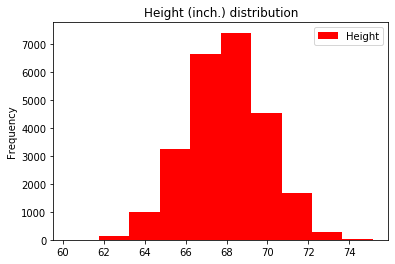

In [9]:
data.plot(y = 'Height', kind = 'hist', color='red',  title='Height (inch.) distribution');

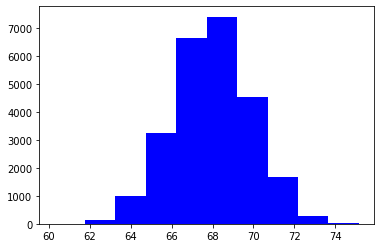

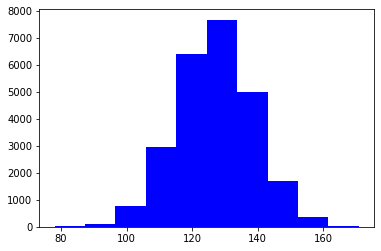

In [33]:
for i in range(0, data.shape[1]):
    plt.hist(x = data.iloc[:,i], color = 'blue')
    plt.show()

In [10]:
def make_bmi(height, weight):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight / KILO_TO_POUND) / (height / METER_TO_INCH)**2

data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)


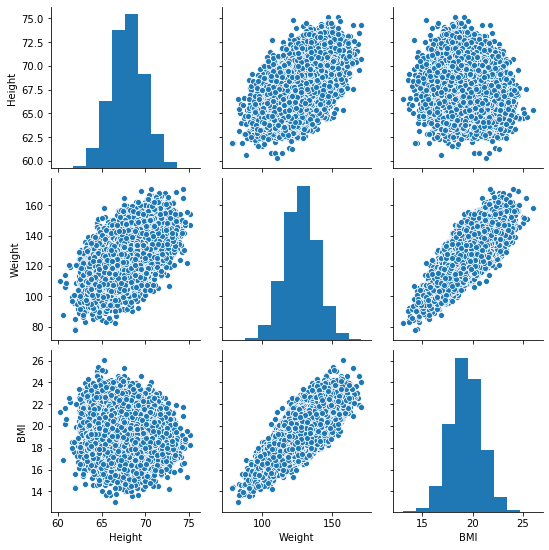

In [11]:
sns.pairplot(data)

In [13]:
def weight_category(weight):
    #category = 0
    if weight < 120:
        category = 1
    if weight >= 150:
        category = 3
    else:
        category = 2
    return category

data['weight_cat'] = data['Weight'].apply(weight_category)

data.head()

,Height,Weight,BMI,weight_cat
Index,,,,
1,65.78331,112.9925,18.357573,2
2,71.51521,136.4873,18.762577,2
3,69.39874,153.0269,22.338895,3
4,68.21660,142.3354,21.504526,2
5,67.78781,144.2971,22.077581,2


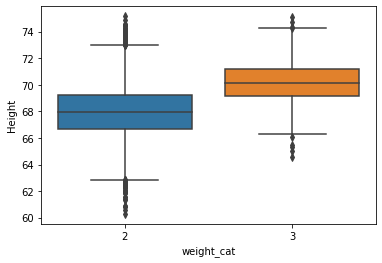

In [14]:
sns.boxplot(y = data['Height'], x = data['weight_cat']);

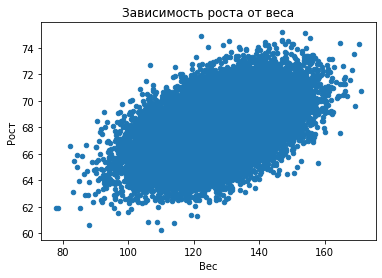

In [15]:
dataPlot = data.plot(x='Weight', y='Height', kind='scatter', title=u'Зависимость роста от веса')
dataPlot.set(xlabel=u'Вес', ylabel=u'Рост')
plt.show()

## Задание 2. Минимизация квадратичной ошибки

In [16]:
def squaredError(w0, w1):
    rData, cData = data.shape
    error = np.zeros(rData)
    error = (data['Height'] - (w0 + w1 * data['Weight'])) ** 2
    return error.sum()

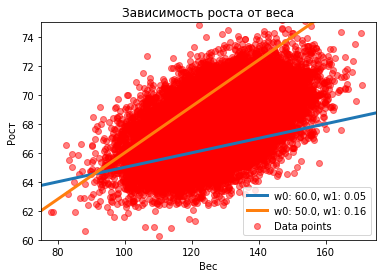

In [20]:
#lambda-функция прямой
lineFunc = lambda x, w0, w1: w0 + w1 * x

#массив точек по оси X
pointsNum = 100
xLines = np.linspace(0, 200, pointsNum)

#массив значений коэффициентов прямых
wLine = np.array( [[60., 0.05], [50, 0.16]] )
rwLine, cwLine = wLine.shape

#массив точек по оси Y
yLines = np.zeros( (rwLine, pointsNum) )
for i in range(rwLine):
    yLines[i] = np.array( lineFunc(xLines, wLine[i, 0], wLine[i, 1]) )
    
#построение графиков
plt.scatter(data['Weight'], data['Height'], alpha=0.5, c='red', label='Data points')
for i in range(rwLine):
    text = 'w0: ' + str(wLine[i, 0]) + ', w1: ' + str(wLine[i, 1])
    plt.plot(xLines, yLines[i], linewidth=3.0, label=text)

plt.legend()
plt.axis( [75, 175, 60, 75] )
plt.title(u'Зависимость роста от веса')
plt.xlabel(u'Вес')
plt.ylabel(u'Рост')
    
plt.show()

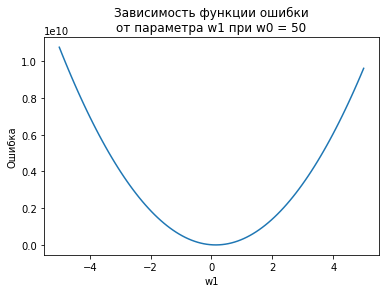

In [30]:
#изменяем параметр w1
numw1Iter = 100
w1Iter = np.linspace(-5., 5., numw1Iter)

#ошибка для каждого w1
errw1Iter = np.zeros( (numw1Iter) )
for i in range(numw1Iter):
    errw1Iter[i] = squaredError(50., w1Iter[i])
    
#построение графика
plt.plot(w1Iter, errw1Iter)

plt.title(u'Зависимость функции ошибки\nот параметра w1 при w0 = 50')
plt.xlabel(u'w1')
plt.ylabel(u'Ошибка')
    
plt.show()

In [39]:
from scipy.optimize import minimize, minimize_scalar
optw1Res = minimize_scalar(lambda w: squaredError(50., w), bounds=(-5, 5))
optw1 = optw1Res.x
print('Optimal w1 value for w0 = 50:', round(optw1, 3))

Optimal w1 value for w0 = 50: 0.141


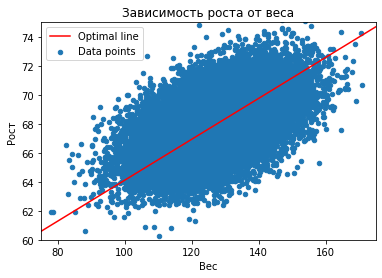

In [40]:
#значения линейной аппроксимации для оптимального значения w1
yLinesOpt = np.array( lineFunc(xLines, 50., optw1) )

#построение графиков
dataPlot = data.plot(x='Weight', y='Height', kind='scatter', title=u'Зависимость роста от веса', label=u'Data points')
dataPlot.set(xlabel=u'Вес', ylabel=u'Рост')

plt.plot(xLines, yLinesOpt, c='red', label=u'Optimal line')

plt.legend()
plt.axis( [75, 175, 60, 75] )
plt.title(u'Зависимость роста от веса')
plt.xlabel(u'Вес')
plt.ylabel(u'Рост')
    
plt.show()

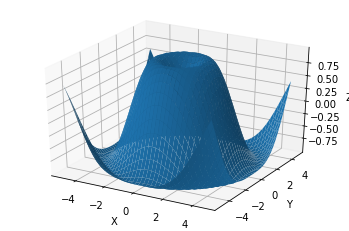

In [42]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

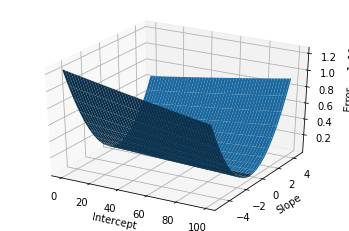

In [43]:
#Постройте 3D-график зависимости функции ошибки, посчитанной в п.6 от параметров $w_0$ и $w_1$. Подпишите ось $x$ меткой «Intercept», ось $y$ – меткой «Slope», a ось $z$ – меткой «Error».
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(0., 100., 1)
Y = np.arange(-5., 5., 0.5)
X, Y = np.meshgrid(X, Y)
squaredErrorVect = np.vectorize(squaredError)
Z = np.array( squaredErrorVect(X.ravel(), Y.ravel()) )
Z.shape = X.shape

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

In [ ]:
#С помощью метода minimize из scipy.optimize найдите минимум функции, определенной в п. 6, для значений параметра $w_0$ в диапазоне [-100,100] и $w_1$ - в диапазоне [-5, 5]. Начальная точка – ($w_0$, $w_1$) = (0, 0). Используйте метод оптимизации L-BFGS-B (аргумент method метода minimize). Проведите на графике из п. 5 Задания 1 прямую, соответствующую найденным оптимальным значениям параметров $w_0$ и $w_1$. Подпишите оси и график

In [53]:
from scipy.optimize import minimize
squaredErrorOneArg = lambda w: squaredError(w[0], w[1])
bnds = ((-100., 100.), (-5., 5.))
x0 = (0., 0.)
optww1Res = minimize(squaredErrorOneArg, x0, bounds=bnds, method='L-BFGS-B')
print (optww1Res)
optw0 = optww1Res.x[0]
optw1 = optww1Res.x[1]
print ('Optimal ( w0, w1 ) value: (', round(optw0, 3), ',', round(optw1, 3), ')')

      fun: 67545.28708653885
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.00145519, 0.        ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 33
      nit: 4
   status: 0
  success: True
        x: array([57.57178753,  0.0820064 ])
Optimal ( w0, w1 ) value: ( 57.572 , 0.082 )


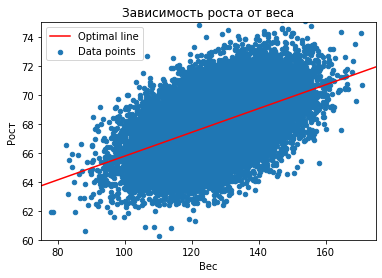

In [54]:
#значения линейной аппроксимации для оптимального значения w1
yLinesOpt = np.array( lineFunc(xLines, optw0, optw1) )

#построение графиков
dataPlot = data.plot(x='Weight', y='Height', kind='scatter', title=u'Зависимость роста от веса', label=u'Data points')
dataPlot.set(xlabel=u'Вес', ylabel=u'Рост')

plt.plot(xLines, yLinesOpt, c='red', label=u'Optimal line')

plt.legend()
plt.axis( [75, 175, 60, 75] )
plt.title(u'Зависимость роста от веса')
plt.xlabel(u'Вес')
plt.ylabel(u'Рост')
    
plt.show()